In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [88]:
pwd

'C:\\Users\\AMAN\\Desktop\\titanic survivor'

In [89]:
 cd "Desktop/titanic survivor/"

[WinError 3] The system cannot find the path specified: 'Desktop/titanic survivor/'
C:\Users\AMAN\Desktop\titanic survivor


In [90]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')
dg=pd.read_csv('gender_submission.csv')

In [63]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [92]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
df.shape

(891, 12)

In [94]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
df.Embarked.fillna('S')
dt.Embarked.fillna('S')
x=1

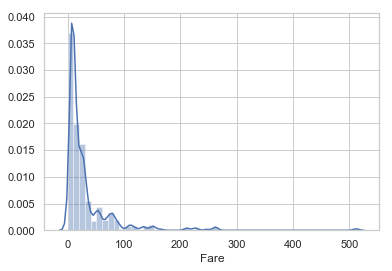

In [97]:
import seaborn as sns
sns.distplot(df.Fare)

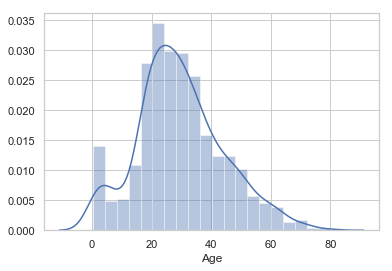

In [98]:
sns.distplot(df[df['Age'].notnull()]['Age'])

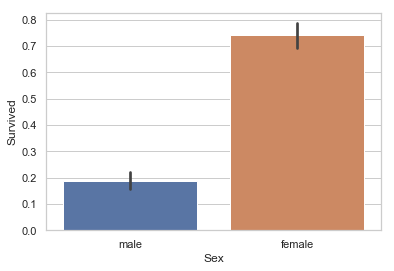

In [99]:
sns.barplot(x='Sex',y='Survived',data=df)

In [100]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [101]:
#mean can not be use because std is high
# we will use interpolation method
df.Age=df.Age.interpolate()
dt.Age=dt.Age.interpolate()
x=1

In [102]:
df.Age.describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

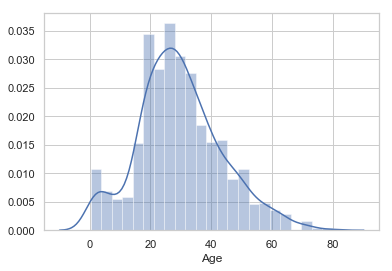

In [103]:
sns.distplot(df.Age)

In [104]:
# distributoion does note change
df=df.drop('Cabin',axis=1)
dt=dt.drop('Cabin',axis=1)

In [105]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
dt = dt.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


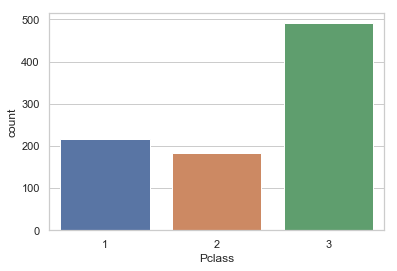

In [106]:
sns.countplot(x='Pclass',data=df)

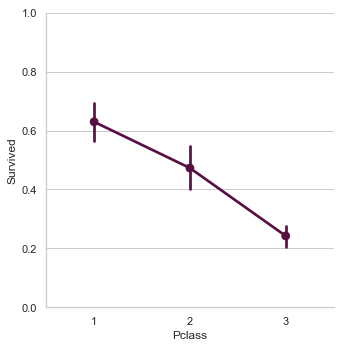

In [107]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

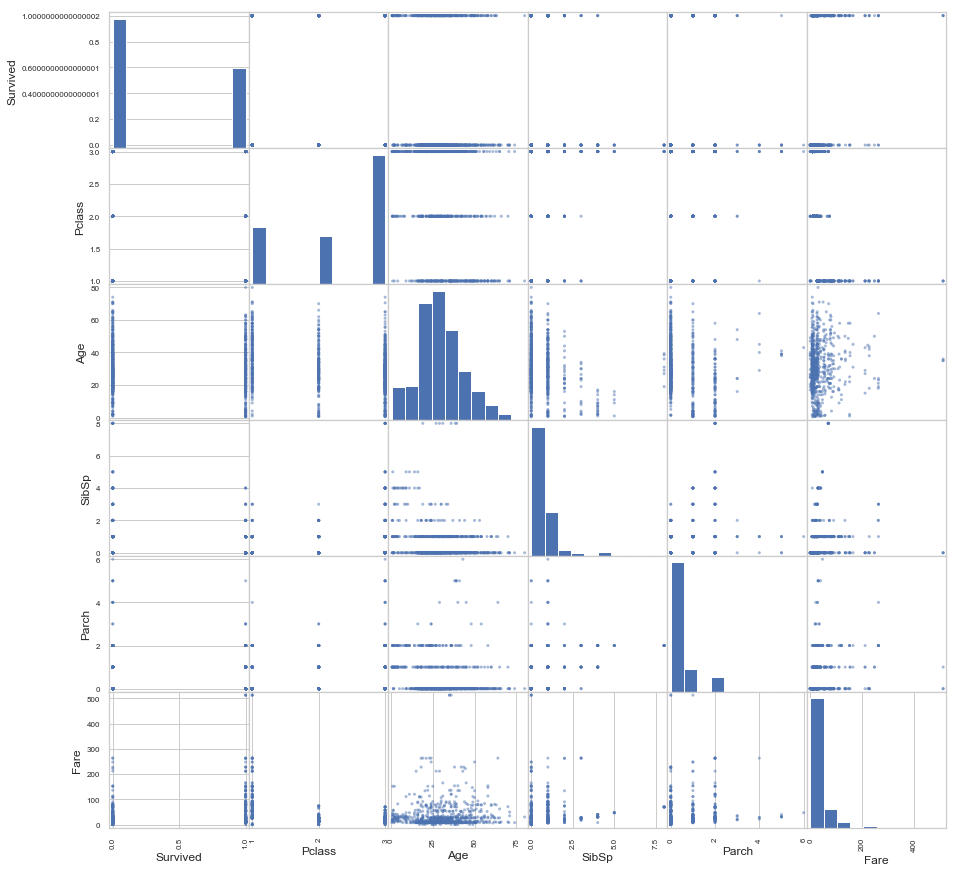

In [108]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=[15,15])
plt.show()

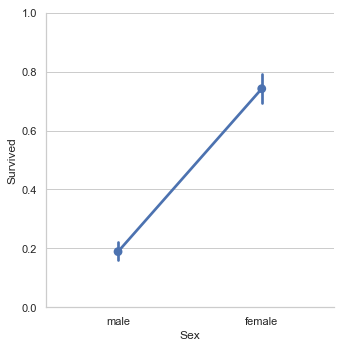

In [109]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))

In [110]:
#we create a in feature is_child(below 15)
dt['is_child'] = dt['Age'].apply(lambda x: 1 if x <= 15 else 0)
df['is_child'] = df['Age'].apply(lambda x: 1 if x <= 15 else 0)

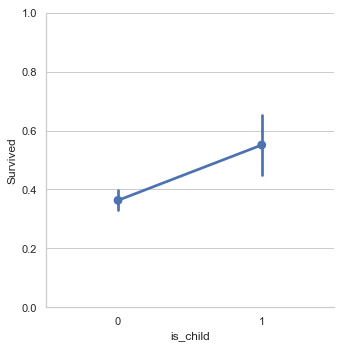

In [111]:
i = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived', size=5)
i.map(sns.pointplot)
i.set(ylim=(0, 1))

In [112]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


In [113]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'is_child'],
      dtype='object')

In [115]:
dt['family'] = dt['SibSp'] + dt['Parch']
dt = dt.drop(['SibSp', 'Parch'], axis=1)
df['family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)

In [118]:
dt.head()

,Pclass,Sex,Age,Fare,Embarked,is_child,family
0,3,male,34.5,7.8292,Q,0,0
1,3,female,47.0,7.0000,S,0,1
2,2,male,62.0,9.6875,Q,0,0
3,3,male,27.0,8.6625,S,0,0
4,3,female,22.0,12.2875,S,0,2


In [121]:
dt['is_alone'] = dt['family'].apply(lambda x: 1 if x == 0 else 0)
df['is_alone'] = df['family'].apply(lambda x: 1 if x == 0 else 0)

In [122]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'is_child',
       'family', 'is_alone'],
      dtype='object')

In [123]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [124]:
dt = pd.get_dummies(dt)
df = pd.get_dummies(df)

In [125]:
df

,Survived,Pclass,Age,Fare,is_child,family,is_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,1,0,0,1
5,0,3,44.5,8.4583,0,0,1,0,1,0,1,0
6,0,1,54.0,51.8625,0,0,1,0,1,0,0,1
7,0,3,2.0,21.0750,1,4,0,0,1,0,0,1
8,1,3,27.0,11.1333,0,2,0,1,0,0,0,1
9,1,2,14.0,30.0708,1,1,0,1,0,1,0,0


In [126]:
y=df['Survived']

In [127]:
X=df.drop(['Survived'],axis=1)

In [128]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [155]:
from sklearn.model_selection import cross_val_score
print(((cross_val_score(DecisionTreeClassifier(),X,y,cv=7))))

[0.7109375  0.7421875  0.78125    0.81102362 0.80314961 0.72440945
 0.86507937]


In [160]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [161]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [162]:
def build_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

In [163]:
decision_tree = build_classifier(GradientBoostingClassifier)

0.8116591928251121


In [168]:
from sklearn.model_selection import cross_val_score
print(np.mean((cross_val_score(LinearRegression(),X,y,cv=7))))

0.37878607019382654


In [170]:
from sklearn.model_selection import cross_val_score
print(np.mean((cross_val_score(KNeighborsClassifier(),X,y,cv=7))))

0.6937527061349474


In [172]:
from sklearn.model_selection import cross_val_score
print(np.mean((cross_val_score(GaussianNB(),X,y,cv=7))))

0.7890062849286696


In [173]:
from sklearn.model_selection import cross_val_score
print(np.mean((cross_val_score(SVC(gamma='auto'),X,y,cv=7))))

0.713939077927759


In [178]:
from sklearn.model_selection import cross_val_score
print(np.mean((cross_val_score(DecisionTreeClassifier(),X,y,cv=7))))

0.7745859334547466


In [179]:
regressor=DecisionTreeClassifier()
regressor.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [198]:
dt.Fare=dt.Fare.interpolate()
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
is_child      418 non-null int64
family        418 non-null int64
is_alone      418 non-null int64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.7 KB


In [200]:
db=regressor.predict(dt)

In [203]:
dg.Survived=db

In [205]:
dg.to_csv('gendersubmission.csv',index=False)

In [206]:
pwd

'C:\\Users\\AMAN\\Desktop\\mch learning'